How many titles and abstracts are actually not in english? Which ones? Use the file created by `detect_language.py`.

In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
foreign = json.load(open('../../../data/json/dim/all/foreign_languages.json'))
data = json.load(open('../../../data/json/dim/all/relevant_data.json'))

In [3]:
for text in ('title', 'abstract'):
  print(len(foreign[text]), len(foreign[text])/len(data))

678 0.02306200891186775
320 0.010884723970203068


In [4]:
langs = {}
for id, lang, prob in foreign['title']:
  if lang not in langs:
    langs[lang] = 1
  else:
    langs[lang] += 1
langs

{'de': 542,
 'no': 5,
 'et': 4,
 'da': 12,
 'id': 3,
 'pl': 2,
 'fr': 19,
 'af': 5,
 'sq': 1,
 'it': 21,
 'so': 2,
 'ro': 23,
 'ca': 12,
 'tl': 8,
 'vi': 4,
 'nl': 6,
 'cy': 3,
 'fi': 1,
 'es': 2,
 'sv': 1,
 'sw': 1,
 'el': 1}

In [5]:
tu, hu, fu = 0, 0, 0
for id, lang, prob in foreign['title']:
  if lang == 'de':
    if 'depositonce' in id:
      tu += 1
    elif 'edoc' in id:
      hu += 1
    else:
      fu += 1
tu, hu, fu

(90, 71, 381)

In [6]:
for id, lang, prob in foreign['title']:
  if lang == 'pl':
    print(data[id]['title'])

Przy Bazantarni, Warsaw
Democrazy ?!


In [7]:
langs = {}
for id, lang, prob in foreign['abstract']:
  if lang not in langs:
    langs[lang] = 1
  else:
    langs[lang] += 1
langs

{'de': 319, 'pl': 1}

In [8]:
for id, lang, prob in foreign['abstract']:
  if lang == 'pt':
    print(data[id]['title'])

In [9]:
def avg_length(data, foreign, text_type, language):
  text_ids = [t[0] for t in foreign[text_type] if t[1] == language]
  text_lengths = [len(data[id][text_type]) for id in text_ids]
  return sum(text_lengths) / len(text_lengths)

In [10]:
lengths = {}
for text_type in ('title', 'abstract'):
  langs = []
  lengths[text_type] = {}
  for id, lang, prob in foreign[text_type]:
    if lang not in langs:
      langs.append(lang)
      lengths[text_type][lang] = avg_length(data, foreign, text_type, lang)

In [11]:
de_title = lengths['title']['de']
de_abstract = lengths['abstract']['de']
other_titles = [length for lang, length in lengths['title'].items() if lang != 'de']
other_abstracts = [length for lang, length in lengths['abstract'].items() if lang != 'de']
other_title = sum(other_titles) / len(other_titles)
other_abstract = sum(other_abstracts) / len(other_abstracts)
de_title, de_abstract, other_title, other_abstract

(83.73431734317343, 3247.561128526646, 20.806458693317143, 1173.0)

Text(0, 0.5, 'No. of characters (log. scale)')

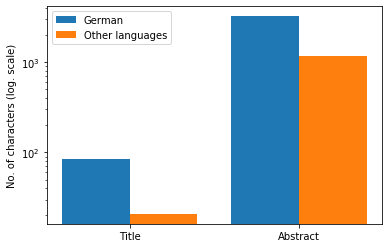

In [12]:
width = .4
plt.bar([0, 1], [de_title, de_abstract], width=width, label='German')
plt.bar([.4, 1.4], [other_title, other_abstract], width=width, label='Other languages')
plt.legend()
plt.yscale('log')
plt.xticks([0.2, 1.2], ['Title', 'Abstract'])
plt.ylabel('No. of characters (log. scale)')